Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


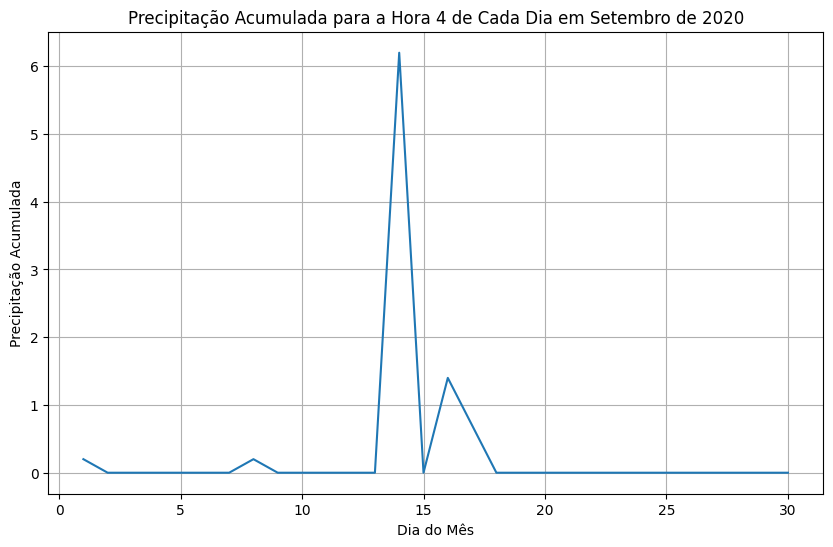

As medidas ausentes no ano de 2016 são: 
CD_ESTACAO      0
DT_MEDICAO      0
HR_MEDICAO      0
CHUVA         343
dtype: int64
A precipitação acumulada para a hora 4 de cada dia em setembro de 2020 é 8.0 mm.


In [6]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

def carregar_dados(caminho_dataset):
    df = pd.read_csv(caminho_dataset, sep=';', decimal=',')
    df['DT_MEDICAO'] = pd.to_datetime(df['DT_MEDICAO'], format='%Y-%m-%d')
    return df

def calcular_precipitacao_acumulada(df):
    filtered_df = df[(df['DT_MEDICAO'].dt.year == 2020) &
                     (df['DT_MEDICAO'].dt.month == 9) &
                     (df['HR_MEDICAO'] <= 400)]
    accumulated_rain = filtered_df.groupby(filtered_df['DT_MEDICAO'].dt.day)['CHUVA'].sum()
    return accumulated_rain

def calcular_medidas_ausentes(df):
    df_2016 = df[df['DT_MEDICAO'].dt.year == 2016]
    missing_values = df_2016.isnull().sum()
    return missing_values

def plotar_grafico(accumulated_rain):
    plt.figure(figsize=(10, 6))
    plt.plot(accumulated_rain.index, accumulated_rain.values)
    plt.xlabel('Dia do Mês')
    plt.ylabel('Precipitação Acumulada')
    plt.title('Precipitação Acumulada para a Hora 4 de Cada Dia em Setembro de 2020')
    plt.grid(True)
    plt.show()

def main():
    drive.mount('/content/gdrive')
    caminho = '/content/gdrive/MyDrive/'
    dataset = 'ds_chuva_sm_2011_2020_10.csv'
    caminho_dataset = caminho + dataset

    df = carregar_dados(caminho_dataset)
    missing_values = calcular_medidas_ausentes(df)
    accumulated_rain = calcular_precipitacao_acumulada(df)
    plotar_grafico(accumulated_rain)

    print(f"As medidas ausentes no ano de 2016 são: \n{missing_values}")
    print(f"A precipitação acumulada para a hora 4 de cada dia em setembro de 2020 é {accumulated_rain.sum()} mm.")

if __name__ == "__main__":
    main()
